In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = '/content/drive/My Drive/Data_Mining'

In [ ]:
import numpy as np
import pandas as pd

import networkx
import matplotlib.pyplot as plt

In [ ]:
# Similarity between two users and removed rows whose similarity is less than 0.9
user_similarities_threshhold_9 = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/graphs/c_combined_edges_w_1_s_0.9.csv')
user_similarities_threshhold_9

,Source,Target,Weight,Sim
0,1,168,30,0.975
1,4,56,13,0.974
2,149,244,12,1.000
3,198,244,4,1.000
4,1,244,16,1.000
...,...,...,...,...
1330,646,584,1,0.939
1331,264,240,1,1.000
1332,257,262,1,1.000
1333,261,262,1,1.000


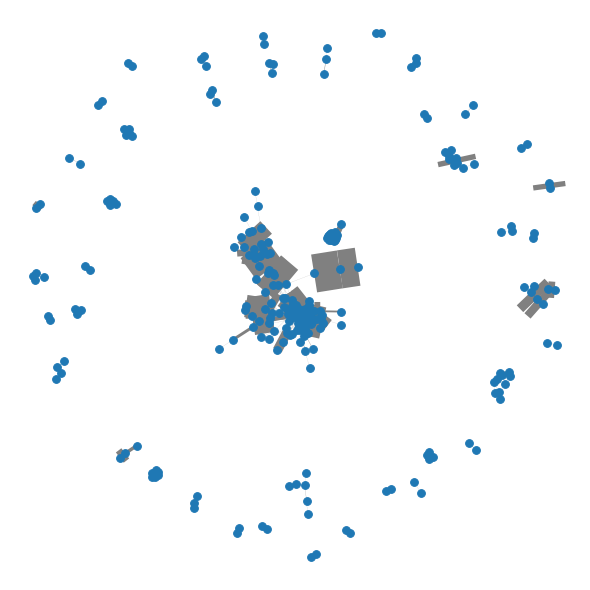

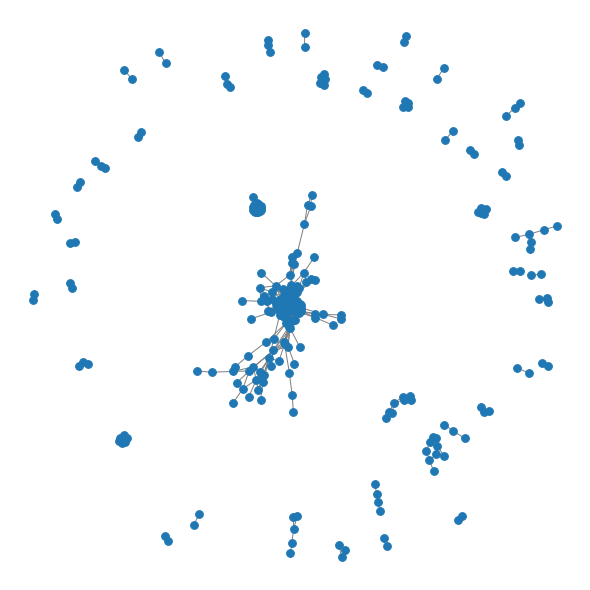

In [ ]:
graph = networkx.Graph()
graph.add_weighted_edges_from(user_similarities_threshhold_9[['Source', 'Target', 'Sim']].values)

# # default
# plt.figure(1)
# networkx.draw(graph, with_labels = True)

# # smaller nodes and fonts
plt.figure(2, figsize=(8,8))
# networkx.draw(graph,node_size=60,font_size=8, width=user_similarities_threshhold_9['Weight']/10, with_labels = True, edge_color='gray') 
networkx.draw(graph,node_size=60,font_size=8, width=user_similarities_threshhold_9['Weight']/10, edge_color='gray') 

plt.figure(3, figsize=(8,8))
networkx.draw(graph,node_size=60,font_size=8, edge_color='gray') 

# # larger figure size
# plt.figure(4,figsize=(12,12)) 
# networkx.draw(graph, with_labels = True)

plt.show()

In [ ]:
# Similarity between two users and removed rows whose weight is more than 2
user_similarities_threshhold_9_and_2 = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/graphs/c_combined_edges_w_2_s_0.9.csv')
user_similarities_threshhold_9_and_2

,Source,Target,Weight,Sim
0,1,168,30,0.975
1,4,56,13,0.974
2,149,244,12,1.000
3,198,244,4,1.000
4,1,244,16,1.000
...,...,...,...,...
544,200,252,12,0.954
545,201,267,9,0.994
546,205,267,9,0.994
547,201,262,4,1.000


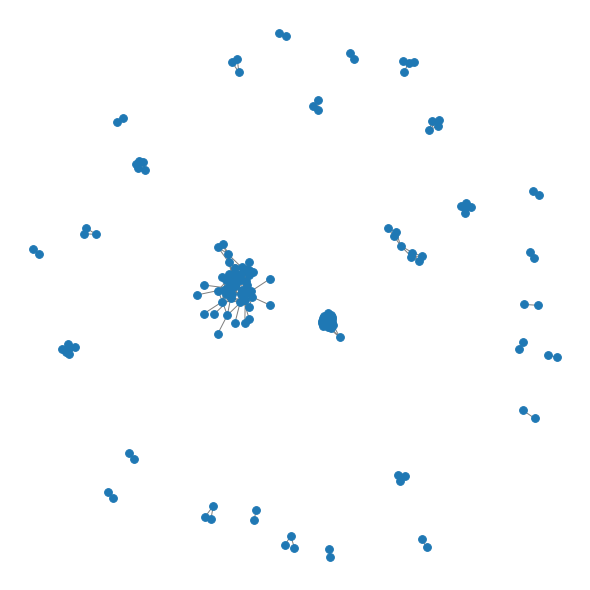

In [ ]:
graph = networkx.Graph()
graph.add_weighted_edges_from(user_similarities_threshhold_9_and_2[['Source', 'Target', 'Sim']].values)

plt.figure(2, figsize=(8,8))
networkx.draw(graph,node_size=60,font_size=8, edge_color='gray') 
plt.show()

In [ ]:
app_user_interaction = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/graphs/app_based_similarity/app_user_interaction_graph/coded_weighted_edges.csv')

In [ ]:
app_user_interaction['app_id'] = app_user_interaction['app_id'].map(str) + '_app'
print(app_user_interaction)

      user_id   app_id  weight
0           1   23_app       9
1           1   33_app     391
2         362  200_app     192
3         362   23_app       8
4         488  176_app      61
...       ...      ...     ...
2017      679   23_app     192
2018      679  118_app       8
2019      721    2_app     200
2020      632  200_app     198
2021      632  201_app       2

[2022 rows x 3 columns]


**Bipartite graph**

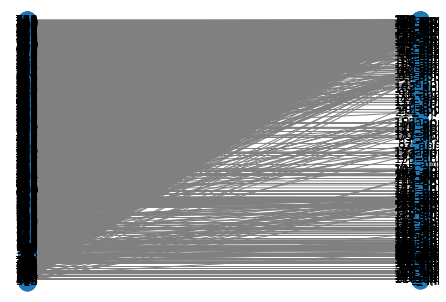

In [ ]:
# imports
import networkx as nx
from networkx.algorithms import bipartite

# Add nodes with the node attribute "bipartite"
B = nx.Graph()
top_nodes = list(app_user_interaction['app_id'])
bottom_nodes = list(app_user_interaction['user_id'])
B.add_nodes_from(top_nodes, bipartite=0)

# Add edges only between nodes of opposite node sets
B.add_nodes_from(bottom_nodes, bipartite=1)
B.add_weighted_edges_from(
    [(row['user_id'], row['app_id'], row['weight']) for idx, row in app_user_interaction.iterrows()], 
    weight='weight')
nx.is_bipartite(B)
nx.is_connected(B)

pos = {node:[0, i] for i,node in enumerate(app_user_interaction['user_id'])}
pos.update({node:[1, i] for i,node in enumerate(app_user_interaction['app_id'])})

nx.draw(B, pos, with_labels=False, edge_color='gray')
# nx.draw(B, pos, with_labels=False, width=app_user_interaction['weight']/10, edge_color='gray')

for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(B, pos)

plt.show()

Take only 50 nodes to see the graph clearly

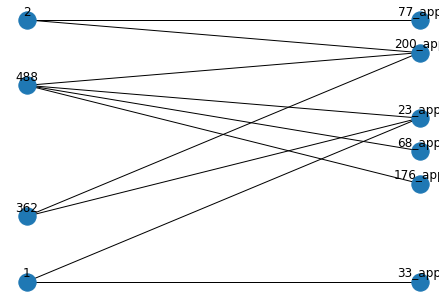

In [ ]:
only50 = app_user_interaction[:10]
# print(only50)

B = nx.Graph()
top_nodes = list(only50['app_id'])
bottom_nodes = list(only50['user_id'])
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)
B.add_weighted_edges_from(
    [(row['user_id'], row['app_id'], row['weight']) for idx, row in only50.iterrows()], 
    weight='weight')
nx.is_bipartite(B)
nx.is_connected(B)

pos = {node:[0, i] for i,node in enumerate(only50['user_id'])}
pos.update({node:[1, i] for i,node in enumerate(only50['app_id'])})

# nx.draw(B, pos, with_labels=False, width=only50['weight']/10)
nx.draw(B, pos, with_labels=False)

for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(B, pos)

plt.show()

**Study if there are applications mainly used by abusive users**

[('Spammer', 23), ('Spammer', 33), ('Spammer', 93), ('Spammer', 102), ('Spammer', 210), ('Spammer', 65), ('Spammer', 32), ('Spammer', 77), ('Spammer', 98), ('Spammer', 158), ('Spammer', 196), ('Spammer', 201), ('Spammer', 80), ('Spammer', 42), ('Spammer', 40), ('Spammer', 178), ('Spammer', 214), ('Spammer', 74), ('Spammer', 52), ('Spammer', 18), ('Spammer', 16), ('Spammer', 109), ('Spammer', 92), ('Spammer', 155), ('Spammer', 146), ('Spammer', 143), ('Spammer', 156), ('Spammer', 46), ('Spammer', 164), ('Spammer', 66), ('Spammer', 87), ('Spammer', 141), ('Spammer', 161), ('Spammer', 150), ('Spammer', 83), ('Spammer', 100), ('Spammer', 89), ('Spammer', 101), ('Spammer', 145), ('Spammer', 204), ('Spammer', 212), ('Spammer', 17), ('Spammer', 22), ('Spammer', 126), ('Spammer', 180), ('Spammer', 140), ('Spammer', 183), ('Spammer', 185), ('Spammer', 169), ('Spammer', 200), ('Spammer', 192), ('Spammer', 128), ('Spammer', 176), ('Spammer', 211), ('Spammer', 203), ('Spammer', 205), ('Spammer', 6

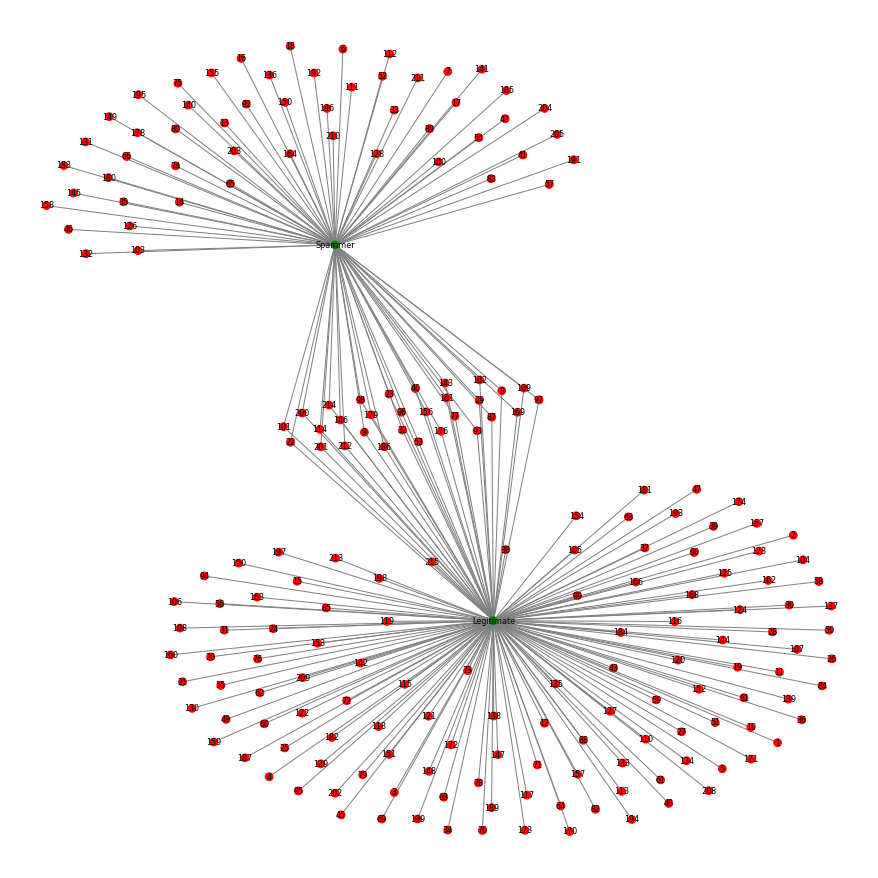

In [ ]:
import networkx
import matplotlib.pyplot as plt

app_user_interaction = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/graphs/app_based_similarity/app_user_interaction_graph/coded_weighted_edges.csv')
labels = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/users/coded_ids_labels_train.csv')
apps_with_labels=pd.merge(app_user_interaction, labels, left_on=['user_id'],right_on=['coded_id']).drop(['coded_id', 'weight'], axis=1)

lab = {"label": {1: "Spammer", 0: "Legitimate"}}
apps_with_labels = apps_with_labels.replace(lab)
apps_with_labels.head()

graph = networkx.Graph()

source_nodes = apps_with_labels['label']

graph.add_edges_from(apps_with_labels[['label', 'app_id']].values)

for n in graph.nodes():
    graph.nodes[n]['color'] = 'r' if n in source_nodes else 'g'

print(graph.edges)

colors = [node[1]['color'] for node in graph.nodes(data=True)]

# # # smaller nodes and fonts
plt.figure(2, figsize=(12,12))
networkx.draw(graph, node_color=colors, node_size=60,font_size=8, with_labels = True, edge_color='gray') 
plt.show()